In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
anime_df = pd.read_csv("raw_data/PopularAnime/animedata-100genre.csv")
anime_df

,Name,Type,Aired,Rating,Votes,Discription,Studio,Genre
0,One Piece,TV Series,1999-2023,9.0,223000,Monkey D. Luffy sets off on an adventure with ...,Toei Animation,"Action, Adventure"
1,Attack on Titan,TV Series,2013-2023,9.1,496000,After his hometown is destroyed and is traumat...,"Wit Studio, Production I.G., Mappa","Action, Dark fantasy, Post-apocalyptic"
2,HUNTER×HUNTER,TV Series,2011-2014,9.0,130000,"Gon Freecss aspires to become a Hunter, an exc...","Madhouse, Nippon Television Network (NTV), Shu...","Adventure, Fantasy, Comedy, Martial arts"
3,Naruto: Shippûden,TV Series,2007-2017,8.7,162000,"Naruto Uzumaki, is a loud, hyperactive, adoles...",Pierrot,"Adventure, Fantasy, Comedy, Martial arts"
4,Naruto,TV Series,2002-2007,8.4,124000,"Naruto Uzumaki, a mischievous adolescent ninja...","Pierrot, Staralis Film Company","Adventure, Fantasy, Comedy, Martial arts"
...,...,...,...,...,...,...,...,...
478,Mahô no yousei Persia,TV Series,1984-1985,7.2,59,Little girl Pelsia can transform into a pretty...,Pierrot,NaN
479,Denki-Gai no Honya-san,TV Series,2014-2014,6.6,143,"A young and shy boy named Umio, started to wor...",Shin Ei Animation,NaN
480,Yume de aetara,TV Series,1998-1998,6.8,59,"The story of Masuo Fuguno, an unlucky salesman...","Tokuma Japan Communications, Tokyo Broadcastin...",NaN
481,Rozen Maiden,TV Series,2013-2023,6.9,147,NaN,NaN,NaN


In [3]:
anime_df.dtypes

Name            object
Type            object
Aired           object
Rating         float64
Votes            int64
Discription     object
Studio          object
Genre           object
dtype: object

In [4]:
jpvisits_df = pd.read_csv("raw_data/JTM_inbound_20240405eng/Grand Total-allint.csv")
jpvisits_df

,Year,Month,grand_total,percent_change
0,1996,1,276086,0.0
1,1996,2,283667,0.0
2,1996,3,310702,0.0
3,1996,4,329303,0.0
4,1996,5,326156,0.0
...,...,...,...,...
343,2024,8,0,0.0
344,2024,9,0,0.0
345,2024,10,0,0.0
346,2024,11,0,0.0


In [5]:
jpvisits_df.dtypes

Year                int64
Month               int64
grand_total         int64
percent_change    float64
dtype: object

In [6]:
anime_df["Aired_start"] = 0
anime_df["Aired_end"] = 0
for years in range(0,483):
    year_range = anime_df["Aired"][years].split("-")
    start_year = int(year_range[0])
    end_year = int(year_range[1])
    anime_df["Aired_start"][years] = start_year
    anime_df["Aired_end"][years] = end_year
anime_df

/var/folders/fx/_v41s7jd6_z_rsjqbd_t4sw80000gn/T/ipykernel_4570/1467171837.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anime_df["Aired_start"][years] = start_year
/var/folders/fx/_v41s7jd6_z_rsjqbd_t4sw80000gn/T/ipykernel_4570/1467171837.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anime_df["Aired_end"][years] = end_year


,Name,Type,Aired,Rating,Votes,Discription,Studio,Genre,Aired_start,Aired_end
0,One Piece,TV Series,1999-2023,9.0,223000,Monkey D. Luffy sets off on an adventure with ...,Toei Animation,"Action, Adventure",1999,2023
1,Attack on Titan,TV Series,2013-2023,9.1,496000,After his hometown is destroyed and is traumat...,"Wit Studio, Production I.G., Mappa","Action, Dark fantasy, Post-apocalyptic",2013,2023
2,HUNTER×HUNTER,TV Series,2011-2014,9.0,130000,"Gon Freecss aspires to become a Hunter, an exc...","Madhouse, Nippon Television Network (NTV), Shu...","Adventure, Fantasy, Comedy, Martial arts",2011,2014
3,Naruto: Shippûden,TV Series,2007-2017,8.7,162000,"Naruto Uzumaki, is a loud, hyperactive, adoles...",Pierrot,"Adventure, Fantasy, Comedy, Martial arts",2007,2017
4,Naruto,TV Series,2002-2007,8.4,124000,"Naruto Uzumaki, a mischievous adolescent ninja...","Pierrot, Staralis Film Company","Adventure, Fantasy, Comedy, Martial arts",2002,2007
...,...,...,...,...,...,...,...,...,...,...
478,Mahô no yousei Persia,TV Series,1984-1985,7.2,59,Little girl Pelsia can transform into a pretty...,Pierrot,NaN,1984,1985
479,Denki-Gai no Honya-san,TV Series,2014-2014,6.6,143,"A young and shy boy named Umio, started to wor...",Shin Ei Animation,NaN,2014,2014
480,Yume de aetara,TV Series,1998-1998,6.8,59,"The story of Masuo Fuguno, an unlucky salesman...","Tokuma Japan Communications, Tokyo Broadcastin...",NaN,1998,1998
481,Rozen Maiden,TV Series,2013-2023,6.9,147,NaN,NaN,NaN,2013,2023


In [7]:
animemaxvotes_df = anime_df[anime_df['Votes'] >= 50000]

# TO DO:
# drop everything below 50K votes.
# normalize/standardize data on both df's and check to see if there's a correlation between popular anime and number of people going to japan.
# drop the protagonist.

In [8]:
jpvisitsav_dict = {}
for y in jpvisits_df["Year"]:
    ave = int(jpvisits_df["grand_total"][jpvisits_df["Year"] == y].mean())
    jpvisitsav_dict[y] = ave
jpvisitsav_dict

{1996: 319759,
 1997: 351517,
 1998: 342171,
 1999: 369821,
 2000: 396428,
 2001: 397629,
 2002: 436580,
 2003: 434310,
 2004: 511492,
 2005: 560660,
 2006: 611173,
 2007: 695580,
 2008: 695902,
 2009: 565804,
 2010: 717597,
 2011: 518229,
 2012: 696508,
 2013: 863658,
 2014: 1117788,
 2015: 1644784,
 2016: 2003308,
 2017: 2390922,
 2018: 2599321,
 2019: 2656837,
 2020: 342985,
 2021: 20488,
 2022: 319342,
 2023: 2088862,
 2024: 456341}

In [9]:
list(jpvisitsav_dict.keys())

[1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021,
 2022,
 2023,
 2024]

In [10]:
jpvisitsav_dict2 = {'year':list(jpvisitsav_dict.keys()), 'average_visits':list(jpvisitsav_dict.values())}
jpvisitsav_dict2

{'year': [1996,
  1997,
  1998,
  1999,
  2000,
  2001,
  2002,
  2003,
  2004,
  2005,
  2006,
  2007,
  2008,
  2009,
  2010,
  2011,
  2012,
  2013,
  2014,
  2015,
  2016,
  2017,
  2018,
  2019,
  2020,
  2021,
  2022,
  2023,
  2024],
 'average_visits': [319759,
  351517,
  342171,
  369821,
  396428,
  397629,
  436580,
  434310,
  511492,
  560660,
  611173,
  695580,
  695902,
  565804,
  717597,
  518229,
  696508,
  863658,
  1117788,
  1644784,
  2003308,
  2390922,
  2599321,
  2656837,
  342985,
  20488,
  319342,
  2088862,
  456341]}

In [11]:
jpvisitssimp_df = pd.DataFrame.from_dict(jpvisitsav_dict2)
# jpvisitssimp_df = jpvisitssimp_df[:-1]
jpvisitssimp_df

,year,average_visits
0,1996,319759
1,1997,351517
2,1998,342171
3,1999,369821
4,2000,396428
5,2001,397629
6,2002,436580
7,2003,434310
8,2004,511492
9,2005,560660


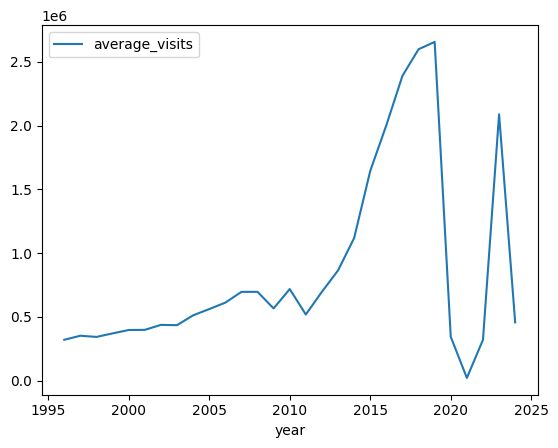

In [12]:
jpvisitssimp_df.plot(x='year', y='average_visits', kind='line')  # Change 'line' to other types like 'bar', 'scatter', etc.
plt.show()

In [13]:
anime_df

,Name,Type,Aired,Rating,Votes,Discription,Studio,Genre,Aired_start,Aired_end
0,One Piece,TV Series,1999-2023,9.0,223000,Monkey D. Luffy sets off on an adventure with ...,Toei Animation,"Action, Adventure",1999,2023
1,Attack on Titan,TV Series,2013-2023,9.1,496000,After his hometown is destroyed and is traumat...,"Wit Studio, Production I.G., Mappa","Action, Dark fantasy, Post-apocalyptic",2013,2023
2,HUNTER×HUNTER,TV Series,2011-2014,9.0,130000,"Gon Freecss aspires to become a Hunter, an exc...","Madhouse, Nippon Television Network (NTV), Shu...","Adventure, Fantasy, Comedy, Martial arts",2011,2014
3,Naruto: Shippûden,TV Series,2007-2017,8.7,162000,"Naruto Uzumaki, is a loud, hyperactive, adoles...",Pierrot,"Adventure, Fantasy, Comedy, Martial arts",2007,2017
4,Naruto,TV Series,2002-2007,8.4,124000,"Naruto Uzumaki, a mischievous adolescent ninja...","Pierrot, Staralis Film Company","Adventure, Fantasy, Comedy, Martial arts",2002,2007
...,...,...,...,...,...,...,...,...,...,...
478,Mahô no yousei Persia,TV Series,1984-1985,7.2,59,Little girl Pelsia can transform into a pretty...,Pierrot,NaN,1984,1985
479,Denki-Gai no Honya-san,TV Series,2014-2014,6.6,143,"A young and shy boy named Umio, started to wor...",Shin Ei Animation,NaN,2014,2014
480,Yume de aetara,TV Series,1998-1998,6.8,59,"The story of Masuo Fuguno, an unlucky salesman...","Tokuma Japan Communications, Tokyo Broadcastin...",NaN,1998,1998
481,Rozen Maiden,TV Series,2013-2023,6.9,147,NaN,NaN,NaN,2013,2023


In [14]:
anime_df['affect_on_jpvisits'] = 0
for row in range(0, 483):
    if anime_df['Aired_start'][row] <= 1995:
        anime_df['affect_on_jpvisits'][row] = 0
    elif anime_df['Aired_start'][row] == anime_df['Aired_end'][row]:
        visits = jpvisitssimp_df['average_visits'][jpvisitssimp_df['year'] == anime_df['Aired_start'][row]].tolist()[0]
        votes_to_visits_ratio = anime_df['Votes'][row] / visits
        anime_df['affect_on_jpvisits'][row] = votes_to_visits_ratio
    else:
        for year in range(anime_df['Aired_start'][row], anime_df['Aired_end'][row]):
            visits_list = []
            visits = jpvisitssimp_df['average_visits'][jpvisitssimp_df['year'] == year].tolist()[0]
            visits_list.append(visits)
            visits_sum = sum(visits_list)
            votes_to_visits_ratio = anime_df['Votes'][row] / visits_sum
            anime_df['affect_on_jpvisits'][row] = votes_to_visits_ratio


/var/folders/fx/_v41s7jd6_z_rsjqbd_t4sw80000gn/T/ipykernel_4570/724854789.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anime_df['affect_on_jpvisits'][row] = votes_to_visits_ratio


In [15]:
jpvisitssimp_df = jpvisitssimp_df[:-1]
jpvisitssimp_df

,year,average_visits
0,1996,319759
1,1997,351517
2,1998,342171
3,1999,369821
4,2000,396428
5,2001,397629
6,2002,436580
7,2003,434310
8,2004,511492
9,2005,560660


In [16]:
anime_df['affect_on_jpvisits']

0      0.698311
1      1.553194
2      0.150523
3      0.080866
4      0.202889
         ...   
478    0.000000
479    0.000128
480    0.000172
481    0.000460
482    0.000000
Name: affect_on_jpvisits, Length: 483, dtype: float64

In [17]:
# TEST DATA
anime_df_test = pd.read_csv("raw_data/PopularAnime/testdata_animedata_102_106.csv")
# L=[100,101,102,103,104] - DO NOT USE
# L=[101,104]
# L=[101]
L=[104]

anime_df_test = anime_df_test.loc[L]

anime_df_test["Aired_start"] = 0
anime_df_test["Aired_end"] = 0
for years in L:
    year_range = anime_df_test["Aired"][years].split("-")
    start_year = int(year_range[0])
    end_year = int(year_range[1])
    anime_df_test["Aired_start"][years] = start_year
    anime_df_test["Aired_end"][years] = end_year

anime_df_test['affect_on_jpvisits'] = 0
for row in L:
    if anime_df_test['Aired_start'][row] <= 1995:
        anime_df_test['affect_on_jpvisits'][row] = 0
    elif anime_df_test['Aired_start'][row] == anime_df_test['Aired_end'][row]:
        visits = jpvisitssimp_df['average_visits'][jpvisitssimp_df['year'] == anime_df_test['Aired_start'][row]].tolist()[0]
        votes_to_visits_ratio = anime_df_test['Votes'][row] / visits
        anime_df_test['affect_on_jpvisits'][row] = votes_to_visits_ratio
    else:
        for year in range(anime_df_test['Aired_start'][row], anime_df_test['Aired_end'][row]):
            visits_list = []
            visits = jpvisitssimp_df['average_visits'][jpvisitssimp_df['year'] == year].tolist()[0]
            visits_list.append(visits)
            visits_sum = sum(visits_list)
            votes_to_visits_ratio = anime_df_test['Votes'][row] / visits_sum
            anime_df_test['affect_on_jpvisits'][row] = votes_to_visits_ratio

rb_scaler = RobustScaler()
rb_scaler.fit(anime_df_test[['Votes']])
anime_df_test['Votes'] = rb_scaler.transform(anime_df_test[['Votes']])

anime_df_test['Years_on_air'] = 0
for row in L:
    if anime_df_test['Aired_end'][row] - anime_df_test['Aired_start'][row] == 0:
        anime_df_test['Years_on_air'][row] = 1
    else:
        new_col = anime_df_test['Aired_end'][row] - anime_df_test['Aired_start'][row]
        anime_df_test['Years_on_air'][row] = new_col

# genres = anime_df_test['Genre'].str.get_dummies(sep=', ')
# animeencoded_df_test = pd.concat([anime_df_test, genres], axis=1)
# # animeencoded_df.drop('Genre', axis=1, inplace=True)
# animeencoded_df_test

/var/folders/fx/_v41s7jd6_z_rsjqbd_t4sw80000gn/T/ipykernel_4570/2217261153.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anime_df_test["Aired_start"][years] = start_year
/var/folders/fx/_v41s7jd6_z_rsjqbd_t4sw80000gn/T/ipykernel_4570/2217261153.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anime_df_test["Aired_end"][years] = end_year
/var/folders/fx/_v41s7jd6_z_rsjqbd_t4sw80000gn/T/ipykernel_4570/2217261153.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

In [18]:
genres = anime_df['Genre'].str.get_dummies(sep=', ')
new = pd.DataFrame()
for col in genres.columns:
    new[[f'{col}']] = pd.DataFrame([[0]], index=anime_df_test.index)

In [19]:
animeencoded_df_test = pd.concat([anime_df_test, new], axis=1)

genres_test = anime_df_test['Genre'].str.get_dummies(sep=', ')
# animeencoded_df_test = pd.concat([anime_df_test, genres], axis=1)
animeencoded_df_test.update(genres_test)

In [20]:
rb_scaler = RobustScaler()
rb_scaler.fit(animemaxvotes_df[['Votes']])
animemaxvotes_df['Votes'] = rb_scaler.transform(animemaxvotes_df[['Votes']])
anime_df['Votes'] = rb_scaler.transform(anime_df[['Votes']])

/var/folders/fx/_v41s7jd6_z_rsjqbd_t4sw80000gn/T/ipykernel_4570/3451347509.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  animemaxvotes_df['Votes'] = rb_scaler.transform(animemaxvotes_df[['Votes']])


In [21]:
rb_scaler = RobustScaler()
rb_scaler.fit(jpvisitssimp_df[['average_visits']])
jpvisitssimp_df['average_visits'] = rb_scaler.transform(jpvisitssimp_df[['average_visits']])

/var/folders/fx/_v41s7jd6_z_rsjqbd_t4sw80000gn/T/ipykernel_4570/720449971.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jpvisitssimp_df['average_visits'] = rb_scaler.transform(jpvisitssimp_df[['average_visits']])


In [22]:
jpvisitssimp_df

,year,average_visits
0,1996,-0.453045
1,1997,-0.393951
2,1998,-0.411342
3,1999,-0.359892
4,2000,-0.310383
5,2001,-0.308148
6,2002,-0.235669
7,2003,-0.239893
8,2004,-0.096276
9,2005,-0.004786


In [23]:
animemaxvotes_df.index

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 10, 11, 12, 15, 18, 19, 20, 21, 27, 29,
            30],
           dtype='int64')

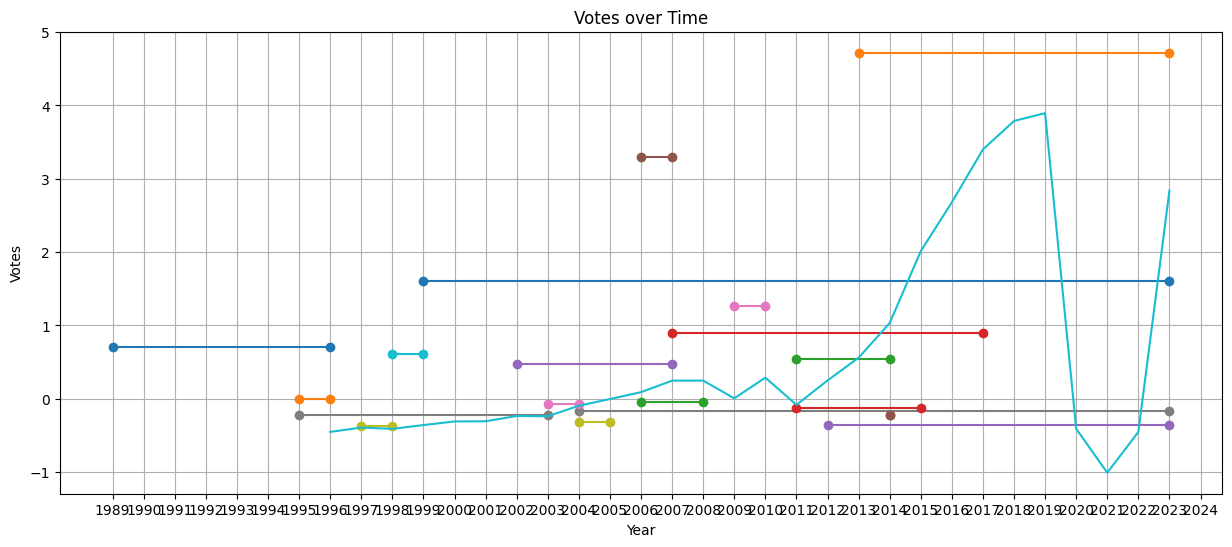

In [24]:
plt.figure(figsize = (15, 6))

for row_index in animemaxvotes_df.index:  # You can change this to plot different rows
    row_data = animemaxvotes_df['Votes'][row_index]
    start_year = animemaxvotes_df['Aired_start'][row_index]
    end_year = animemaxvotes_df['Aired_end'][row_index]
    # Plotting
    plt.plot([start_year, end_year], [row_data, row_data], marker='o')
plt.plot(jpvisitssimp_df['year'], jpvisitssimp_df['average_visits'])
plt.xlabel('Year')
plt.ylabel('Votes')
plt.title('Votes over Time')
plt.xticks(range(1989, 2025))  # Set x-axis ticks to start_year and end_year
plt.grid(True)
plt.show()

In [25]:
anime_df.index

RangeIndex(start=0, stop=483, step=1)

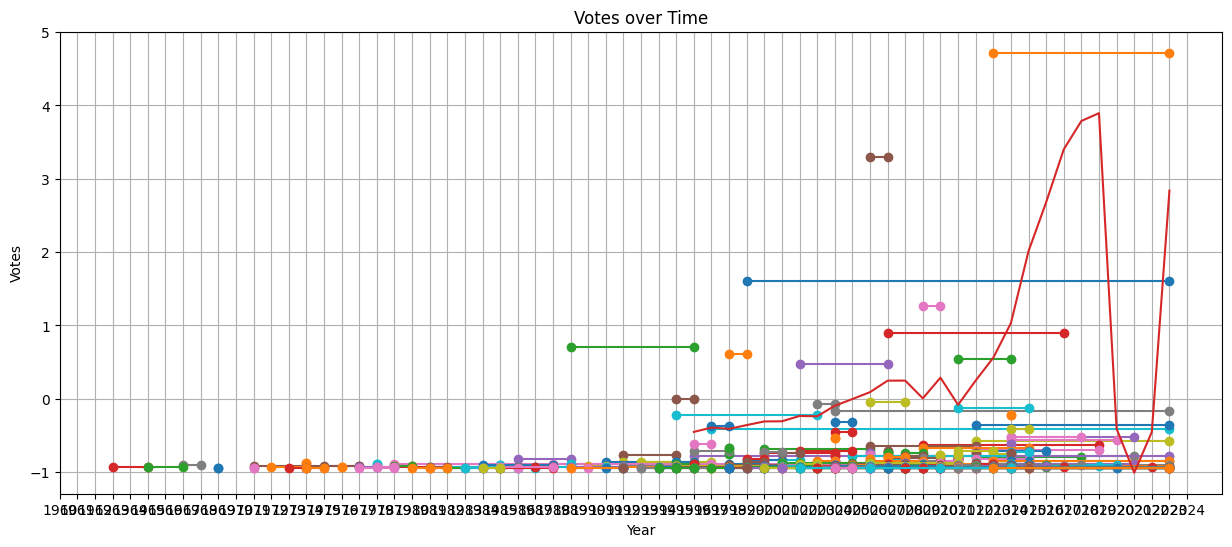

In [26]:
plt.figure(figsize = (15, 6))

for row_index in anime_df.index:  # You can change this to plot different rows
    row_data = anime_df['Votes'][row_index]
    start_year = anime_df['Aired_start'][row_index]
    end_year = anime_df['Aired_end'][row_index]
    # Plotting
    plt.plot([start_year, end_year], [row_data, row_data], marker='o')
plt.plot(jpvisitssimp_df['year'], jpvisitssimp_df['average_visits'])
plt.xlabel('Year')
plt.ylabel('Votes')
plt.title('Votes over Time')
plt.xticks(range(1960, 2025))  # Set x-axis ticks to start_year and end_year
plt.grid(True)
plt.show()


# What is MISSING from data above:
## The votes are overall, and we cannot see how the votes (aka popularity) changed overtime. So it is assumed it's remained unchaged.

In [27]:
anime_df.index

RangeIndex(start=0, stop=483, step=1)

# TO DO
# one hot encode the genres.
# make a model with genre types and votes and years on air as input and precentage of affecting travelling to japan as output.
# (if too complicated, just see which genres can be more successful)

In [28]:
anime_df

,Name,Type,Aired,Rating,Votes,Discription,Studio,Genre,Aired_start,Aired_end,affect_on_jpvisits
0,One Piece,TV Series,1999-2023,9.0,1.600000,Monkey D. Luffy sets off on an adventure with ...,Toei Animation,"Action, Adventure",1999,2023,0.698311
1,Attack on Titan,TV Series,2013-2023,9.1,4.720000,After his hometown is destroyed and is traumat...,"Wit Studio, Production I.G., Mappa","Action, Dark fantasy, Post-apocalyptic",2013,2023,1.553194
2,HUNTER×HUNTER,TV Series,2011-2014,9.0,0.537143,"Gon Freecss aspires to become a Hunter, an exc...","Madhouse, Nippon Television Network (NTV), Shu...","Adventure, Fantasy, Comedy, Martial arts",2011,2014,0.150523
3,Naruto: Shippûden,TV Series,2007-2017,8.7,0.902857,"Naruto Uzumaki, is a loud, hyperactive, adoles...",Pierrot,"Adventure, Fantasy, Comedy, Martial arts",2007,2017,0.080866
4,Naruto,TV Series,2002-2007,8.4,0.468571,"Naruto Uzumaki, a mischievous adolescent ninja...","Pierrot, Staralis Film Company","Adventure, Fantasy, Comedy, Martial arts",2002,2007,0.202889
...,...,...,...,...,...,...,...,...,...,...,...
478,Mahô no yousei Persia,TV Series,1984-1985,7.2,-0.947897,Little girl Pelsia can transform into a pretty...,Pierrot,NaN,1984,1985,0.000000
479,Denki-Gai no Honya-san,TV Series,2014-2014,6.6,-0.946937,"A young and shy boy named Umio, started to wor...",Shin Ei Animation,NaN,2014,2014,0.000128
480,Yume de aetara,TV Series,1998-1998,6.8,-0.947897,"The story of Masuo Fuguno, an unlucky salesman...","Tokuma Japan Communications, Tokyo Broadcastin...",NaN,1998,1998,0.000172
481,Rozen Maiden,TV Series,2013-2023,6.9,-0.946891,NaN,NaN,NaN,2013,2023,0.000460


In [29]:
anime_df['Years_on_air'] = 0
for row in range(0, 483):
    if anime_df['Aired_end'][row] - anime_df['Aired_start'][row] == 0:
        anime_df['Years_on_air'][row] = 1
    else:
        new_col = anime_df['Aired_end'][row] - anime_df['Aired_start'][row]
        anime_df['Years_on_air'][row] = new_col

/var/folders/fx/_v41s7jd6_z_rsjqbd_t4sw80000gn/T/ipykernel_4570/2013857142.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anime_df['Years_on_air'][row] = new_col
/var/folders/fx/_v41s7jd6_z_rsjqbd_t4sw80000gn/T/ipykernel_4570/2013857142.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anime_df['Years_on_air'][row] = 1


In [30]:
anime_df["Genre"]

0                             Action, Adventure
1        Action, Dark fantasy, Post-apocalyptic
2      Adventure, Fantasy, Comedy, Martial arts
3      Adventure, Fantasy, Comedy, Martial arts
4      Adventure, Fantasy, Comedy, Martial arts
                         ...                   
478                                         NaN
479                                         NaN
480                                         NaN
481                                         NaN
482                                         NaN
Name: Genre, Length: 483, dtype: object

In [31]:
# enc = OneHotEncoder(handle_unknown='ignore')
# genres = anime_df['Genre'].str.get_dummies(sep=', ')
# enc.fit(genres)
# enc.categories_
# enc.transform([['Female', 1], ['Male', 4]]).toarray()
# enc.inverse_transform([[0, 1, 1, 0, 0], [0, 0, 0, 1, 0]])
# enc.get_feature_names_out(['gender', 'group'])

# genres = anime_df['Genre'].str.get_dummies(sep=', ')
animeencoded_df = pd.concat([anime_df, genres], axis=1)
animeencoded_df

,Name,Type,Aired,Rating,Votes,Discription,Studio,Genre,Aired_start,Aired_end,...,Spy,Steampunk,Supernatural,Supernatural horror,Supernatural thriller,Surrealism,Thriller,Tragedy,Vampire,Western
0,One Piece,TV Series,1999-2023,9.0,1.600000,Monkey D. Luffy sets off on an adventure with ...,Toei Animation,"Action, Adventure",1999,2023,...,0,0,0,0,0,0,0,0,0,0
1,Attack on Titan,TV Series,2013-2023,9.1,4.720000,After his hometown is destroyed and is traumat...,"Wit Studio, Production I.G., Mappa","Action, Dark fantasy, Post-apocalyptic",2013,2023,...,0,0,0,0,0,0,0,0,0,0
2,HUNTER×HUNTER,TV Series,2011-2014,9.0,0.537143,"Gon Freecss aspires to become a Hunter, an exc...","Madhouse, Nippon Television Network (NTV), Shu...","Adventure, Fantasy, Comedy, Martial arts",2011,2014,...,0,0,0,0,0,0,0,0,0,0
3,Naruto: Shippûden,TV Series,2007-2017,8.7,0.902857,"Naruto Uzumaki, is a loud, hyperactive, adoles...",Pierrot,"Adventure, Fantasy, Comedy, Martial arts",2007,2017,...,0,0,0,0,0,0,0,0,0,0
4,Naruto,TV Series,2002-2007,8.4,0.468571,"Naruto Uzumaki, a mischievous adolescent ninja...","Pierrot, Staralis Film Company","Adventure, Fantasy, Comedy, Martial arts",2002,2007,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478,Mahô no yousei Persia,TV Series,1984-1985,7.2,-0.947897,Little girl Pelsia can transform into a pretty...,Pierrot,NaN,1984,1985,...,0,0,0,0,0,0,0,0,0,0
479,Denki-Gai no Honya-san,TV Series,2014-2014,6.6,-0.946937,"A young and shy boy named Umio, started to wor...",Shin Ei Animation,NaN,2014,2014,...,0,0,0,0,0,0,0,0,0,0
480,Yume de aetara,TV Series,1998-1998,6.8,-0.947897,"The story of Masuo Fuguno, an unlucky salesman...","Tokuma Japan Communications, Tokyo Broadcastin...",NaN,1998,1998,...,0,0,0,0,0,0,0,0,0,0
481,Rozen Maiden,TV Series,2013-2023,6.9,-0.946891,NaN,NaN,NaN,2013,2023,...,0,0,0,0,0,0,0,0,0,0


In [32]:
genres.columns

Index(['Action', 'Adventure', 'Alternate history', 'Bangsian fantasy',
       'Body horror', 'Comedy', 'Comedy drama', 'Coming-of-age', 'Crime',
       'Crime Girls with guns', 'Cyberpunk', 'Dark comedy', 'Dark fantasy',
       'Demographic', 'Drama', 'Fantasy', 'Harem', 'Historical',
       'Historical Fiction', 'Horror', 'Magical girl', 'Martial arts', 'Mecha',
       'Murder mystery', 'Musical', 'Mystery', 'Neo-noir', 'Post-apocalyptic',
       'Pseudo-historical', 'Psychological horror', 'Psychological thriller',
       'Reverse harem', 'Romance', 'Romantic comedy', 'Romantic drama',
       'Samurai', 'Science Fiction', 'Science fantasy', 'Slice of life',
       'Space', 'Sports', 'Spy', 'Steampunk', 'Supernatural',
       'Supernatural horror', 'Supernatural thriller', 'Surrealism',
       'Thriller', 'Tragedy', 'Vampire', 'Western'],
      dtype='object')

In [33]:
animeencodedgenre_df = animeencoded_df.dropna(subset=['Genre'])
animeencodedgenre_df

,Name,Type,Aired,Rating,Votes,Discription,Studio,Genre,Aired_start,Aired_end,...,Spy,Steampunk,Supernatural,Supernatural horror,Supernatural thriller,Surrealism,Thriller,Tragedy,Vampire,Western
0,One Piece,TV Series,1999-2023,9.0,1.600000,Monkey D. Luffy sets off on an adventure with ...,Toei Animation,"Action, Adventure",1999,2023,...,0,0,0,0,0,0,0,0,0,0
1,Attack on Titan,TV Series,2013-2023,9.1,4.720000,After his hometown is destroyed and is traumat...,"Wit Studio, Production I.G., Mappa","Action, Dark fantasy, Post-apocalyptic",2013,2023,...,0,0,0,0,0,0,0,0,0,0
2,HUNTER×HUNTER,TV Series,2011-2014,9.0,0.537143,"Gon Freecss aspires to become a Hunter, an exc...","Madhouse, Nippon Television Network (NTV), Shu...","Adventure, Fantasy, Comedy, Martial arts",2011,2014,...,0,0,0,0,0,0,0,0,0,0
3,Naruto: Shippûden,TV Series,2007-2017,8.7,0.902857,"Naruto Uzumaki, is a loud, hyperactive, adoles...",Pierrot,"Adventure, Fantasy, Comedy, Martial arts",2007,2017,...,0,0,0,0,0,0,0,0,0,0
4,Naruto,TV Series,2002-2007,8.4,0.468571,"Naruto Uzumaki, a mischievous adolescent ninja...","Pierrot, Staralis Film Company","Adventure, Fantasy, Comedy, Martial arts",2002,2007,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,World Trigger,TV Series,2014-2023,7.5,-0.937143,"A gate to another dimension has burst open, an...",Toei Animation,"Action, Science Fiction, Demographic",2014,2023,...,0,0,0,0,0,0,0,0,0,0
95,Darker Than Black: Kuro No Keiyakusha,TV Series,2007-2010,7.7,-0.811429,"In Tokyo, an impenetrable field known as ""Hell...","Aniplex, Bones, Hakuhodo DY Media Partners","Mystery, Science Fiction, Supernatural thriller",2007,2010,...,0,0,0,0,1,0,0,0,0,0
96,Kaichou Wa Meido-sama!,TV Series,2010-2011,7.9,-0.850286,Ayuzawa Misaki serves as the student council p...,"Geneon Universal Entertainment, Hakusensha, Ha...",Romantic comedy,2010,2011,...,0,0,0,0,0,0,0,0,0,0
97,Date a Live,TV Series,2013-2023,6.9,-0.904000,A boy named Itsuka Shido meets a spirit girl w...,"AIC Plus, Anime International Company (AIC), G...","Romantic comedy, Science fantasy",2013,2023,...,0,0,0,0,0,0,0,0,0,0


In [34]:
print(animeencodedgenre_df.columns)
print(len(animeencodedgenre_df.columns))

Index(['Name', 'Type', 'Aired', 'Rating', 'Votes', 'Discription', 'Studio',
       'Genre', 'Aired_start', 'Aired_end', 'affect_on_jpvisits',
       'Years_on_air', 'Action', 'Adventure', 'Alternate history',
       'Bangsian fantasy', 'Body horror', 'Comedy', 'Comedy drama',
       'Coming-of-age', 'Crime', 'Crime Girls with guns', 'Cyberpunk',
       'Dark comedy', 'Dark fantasy', 'Demographic', 'Drama', 'Fantasy',
       'Harem', 'Historical', 'Historical Fiction', 'Horror', 'Magical girl',
       'Martial arts', 'Mecha', 'Murder mystery', 'Musical', 'Mystery',
       'Neo-noir', 'Post-apocalyptic', 'Pseudo-historical',
       'Psychological horror', 'Psychological thriller', 'Reverse harem',
       'Romance', 'Romantic comedy', 'Romantic drama', 'Samurai',
       'Science Fiction', 'Science fantasy', 'Slice of life', 'Space',
       'Sports', 'Spy', 'Steampunk', 'Supernatural', 'Supernatural horror',
       'Supernatural thriller', 'Surrealism', 'Thriller', 'Tragedy', 'Vampire',
  

In [35]:
animeencodedgenre_df.columns

Index(['Name', 'Type', 'Aired', 'Rating', 'Votes', 'Discription', 'Studio',
       'Genre', 'Aired_start', 'Aired_end', 'affect_on_jpvisits',
       'Years_on_air', 'Action', 'Adventure', 'Alternate history',
       'Bangsian fantasy', 'Body horror', 'Comedy', 'Comedy drama',
       'Coming-of-age', 'Crime', 'Crime Girls with guns', 'Cyberpunk',
       'Dark comedy', 'Dark fantasy', 'Demographic', 'Drama', 'Fantasy',
       'Harem', 'Historical', 'Historical Fiction', 'Horror', 'Magical girl',
       'Martial arts', 'Mecha', 'Murder mystery', 'Musical', 'Mystery',
       'Neo-noir', 'Post-apocalyptic', 'Pseudo-historical',
       'Psychological horror', 'Psychological thriller', 'Reverse harem',
       'Romance', 'Romantic comedy', 'Romantic drama', 'Samurai',
       'Science Fiction', 'Science fantasy', 'Slice of life', 'Space',
       'Sports', 'Spy', 'Steampunk', 'Supernatural', 'Supernatural horror',
       'Supernatural thriller', 'Surrealism', 'Thriller', 'Tragedy', 'Vampire',
  

In [36]:
animeencodedgenre_df['affect_on_jpvisits']

0     0.698311
1     1.553194
2     0.150523
3     0.080866
4     0.202889
        ...   
94    0.003131
95    0.021209
96    0.011984
97    0.012213
98    0.010472
Name: affect_on_jpvisits, Length: 85, dtype: float64

In [37]:
# Genre types and votes and total years on air as input and
# precentage of affecting travelling to japan as output.

dataX = animeencodedgenre_df.drop(['Name', 'Type', 'Aired', 'Rating', 'Votes', 'Discription', 'Studio',
       'Genre', 'Aired_start', 'Aired_end', 'affect_on_jpvisits'], axis=1)
dataY = animeencodedgenre_df['affect_on_jpvisits']

train_ratio = 0.70
validation_ratio = 0.15
test_ratio = 0.15

# train is now 70% of the entire data set
x_train, x_test, y_train, y_test = train_test_split(dataX, dataY, test_size=1 - train_ratio)

# test is now 15% of the initial data set
# validation is now 15% of the initial data set
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio))

# print(x_train, x_val, x_test)

In [38]:
# dataX

,Years_on_air,Action,Adventure,Alternate history,Bangsian fantasy,Body horror,Comedy,Comedy drama,Coming-of-age,Crime,...,Spy,Steampunk,Supernatural,Supernatural horror,Supernatural thriller,Surrealism,Thriller,Tragedy,Vampire,Western
0,24,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,10,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,10,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,9,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
95,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
96,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
97,10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
# dataY

0     0.698311
1     1.553194
2     0.150523
3     0.080866
4     0.202889
        ...   
94    0.003131
95    0.021209
96    0.011984
97    0.012213
98    0.010472
Name: affect_on_jpvisits, Length: 85, dtype: float64

In [40]:
anime_df_test

,Name,Type,Aired,Rating,Votes,Discription,Studio,Genre,Aired_start,Aired_end,affect_on_jpvisits,Years_on_air
104,Log Horizon,TV Series,2013-2021,7.5,0.0,Elder Tale is an online fantasy RPG that has b...,"NHK Enterprises, NHK, Satelight","Adventure, Science Fiction",2013,2021,0.013703,8


In [41]:
animeencodedgenre_df.columns

Index(['Name', 'Type', 'Aired', 'Rating', 'Votes', 'Discription', 'Studio',
       'Genre', 'Aired_start', 'Aired_end', 'affect_on_jpvisits',
       'Years_on_air', 'Action', 'Adventure', 'Alternate history',
       'Bangsian fantasy', 'Body horror', 'Comedy', 'Comedy drama',
       'Coming-of-age', 'Crime', 'Crime Girls with guns', 'Cyberpunk',
       'Dark comedy', 'Dark fantasy', 'Demographic', 'Drama', 'Fantasy',
       'Harem', 'Historical', 'Historical Fiction', 'Horror', 'Magical girl',
       'Martial arts', 'Mecha', 'Murder mystery', 'Musical', 'Mystery',
       'Neo-noir', 'Post-apocalyptic', 'Pseudo-historical',
       'Psychological horror', 'Psychological thriller', 'Reverse harem',
       'Romance', 'Romantic comedy', 'Romantic drama', 'Samurai',
       'Science Fiction', 'Science fantasy', 'Slice of life', 'Space',
       'Sports', 'Spy', 'Steampunk', 'Supernatural', 'Supernatural horror',
       'Supernatural thriller', 'Surrealism', 'Thriller', 'Tragedy', 'Vampire',
  

In [42]:
animeencoded_df_test.columns

Index(['Name', 'Type', 'Aired', 'Rating', 'Votes', 'Discription', 'Studio',
       'Genre', 'Aired_start', 'Aired_end', 'affect_on_jpvisits',
       'Years_on_air', 'Action', 'Adventure', 'Alternate history',
       'Bangsian fantasy', 'Body horror', 'Comedy', 'Comedy drama',
       'Coming-of-age', 'Crime', 'Crime Girls with guns', 'Cyberpunk',
       'Dark comedy', 'Dark fantasy', 'Demographic', 'Drama', 'Fantasy',
       'Harem', 'Historical', 'Historical Fiction', 'Horror', 'Magical girl',
       'Martial arts', 'Mecha', 'Murder mystery', 'Musical', 'Mystery',
       'Neo-noir', 'Post-apocalyptic', 'Pseudo-historical',
       'Psychological horror', 'Psychological thriller', 'Reverse harem',
       'Romance', 'Romantic comedy', 'Romantic drama', 'Samurai',
       'Science Fiction', 'Science fantasy', 'Slice of life', 'Space',
       'Sports', 'Spy', 'Steampunk', 'Supernatural', 'Supernatural horror',
       'Supernatural thriller', 'Surrealism', 'Thriller', 'Tragedy', 'Vampire',
  

In [43]:
animeencodedgenre_df.columns

Index(['Name', 'Type', 'Aired', 'Rating', 'Votes', 'Discription', 'Studio',
       'Genre', 'Aired_start', 'Aired_end', 'affect_on_jpvisits',
       'Years_on_air', 'Action', 'Adventure', 'Alternate history',
       'Bangsian fantasy', 'Body horror', 'Comedy', 'Comedy drama',
       'Coming-of-age', 'Crime', 'Crime Girls with guns', 'Cyberpunk',
       'Dark comedy', 'Dark fantasy', 'Demographic', 'Drama', 'Fantasy',
       'Harem', 'Historical', 'Historical Fiction', 'Horror', 'Magical girl',
       'Martial arts', 'Mecha', 'Murder mystery', 'Musical', 'Mystery',
       'Neo-noir', 'Post-apocalyptic', 'Pseudo-historical',
       'Psychological horror', 'Psychological thriller', 'Reverse harem',
       'Romance', 'Romantic comedy', 'Romantic drama', 'Samurai',
       'Science Fiction', 'Science fantasy', 'Slice of life', 'Space',
       'Sports', 'Spy', 'Steampunk', 'Supernatural', 'Supernatural horror',
       'Supernatural thriller', 'Surrealism', 'Thriller', 'Tragedy', 'Vampire',
  

In [44]:
animeencoded_df_test.columns

Index(['Name', 'Type', 'Aired', 'Rating', 'Votes', 'Discription', 'Studio',
       'Genre', 'Aired_start', 'Aired_end', 'affect_on_jpvisits',
       'Years_on_air', 'Action', 'Adventure', 'Alternate history',
       'Bangsian fantasy', 'Body horror', 'Comedy', 'Comedy drama',
       'Coming-of-age', 'Crime', 'Crime Girls with guns', 'Cyberpunk',
       'Dark comedy', 'Dark fantasy', 'Demographic', 'Drama', 'Fantasy',
       'Harem', 'Historical', 'Historical Fiction', 'Horror', 'Magical girl',
       'Martial arts', 'Mecha', 'Murder mystery', 'Musical', 'Mystery',
       'Neo-noir', 'Post-apocalyptic', 'Pseudo-historical',
       'Psychological horror', 'Psychological thriller', 'Reverse harem',
       'Romance', 'Romantic comedy', 'Romantic drama', 'Samurai',
       'Science Fiction', 'Science fantasy', 'Slice of life', 'Space',
       'Sports', 'Spy', 'Steampunk', 'Supernatural', 'Supernatural horror',
       'Supernatural thriller', 'Surrealism', 'Thriller', 'Tragedy', 'Vampire',
  

In [45]:
animeencoded_df_test

,Name,Type,Aired,Rating,Votes,Discription,Studio,Genre,Aired_start,Aired_end,...,Spy,Steampunk,Supernatural,Supernatural horror,Supernatural thriller,Surrealism,Thriller,Tragedy,Vampire,Western
104,Log Horizon,TV Series,2013-2021,7.5,0.0,Elder Tale is an online fantasy RPG that has b...,"NHK Enterprises, NHK, Satelight","Adventure, Science Fiction",2013,2021,...,0,0,0,0,0,0,0,0,0,0


In [46]:
animeencoded_df_test.loc[L]

,Name,Type,Aired,Rating,Votes,Discription,Studio,Genre,Aired_start,Aired_end,...,Spy,Steampunk,Supernatural,Supernatural horror,Supernatural thriller,Surrealism,Thriller,Tragedy,Vampire,Western
104,Log Horizon,TV Series,2013-2021,7.5,0.0,Elder Tale is an online fantasy RPG that has b...,"NHK Enterprises, NHK, Satelight","Adventure, Science Fiction",2013,2021,...,0,0,0,0,0,0,0,0,0,0


In [47]:
x_new = animeencoded_df_test.drop(['Name', 'Type', 'Aired', 'Rating', 'Votes', 'Discription', 'Studio',
       'Genre', 'Aired_start', 'Aired_end', 'affect_on_jpvisits'], axis=1)

# Step 3: Choose a Model and Train
model = LinearRegression()  # Example: Linear Regression
model.fit(x_train, y_train)

# Step 4: Model Evaluation
val_predictions = model.predict(x_val)
val_mse = mean_squared_error(y_val, val_predictions)
print("Validation Mean Squared Error:", val_mse)

# Step 6: Final Evaluation
test_predictions = model.predict(x_test)
test_mse = mean_squared_error(y_test, test_predictions)
print("Test Mean Squared Error:", test_mse)

score = model.score(x_train, y_train)
print("Model Score:", score)

# Step 7: Prediction on new data
new_predictions = model.predict(x_new)
new_predictions

print(f"\n**** What all this means is that:\nIf a new anime is introduced\nin the genre of {animeencoded_df_test['Genre'][L[0]]} and\nstays on the air for {animeencoded_df_test['Years_on_air'][L[0]]} year(s),\nwe can say, with an estimation of {round(score*100, 2)} accuracy, that\nit has {round(new_predictions[0]*100, 2)} percent chance of encouraging foreigners to visit Japan! ****")


Validation Mean Squared Error: 0.09580009526078108
Test Mean Squared Error: 0.18182363832387843
Model Score: 0.7983492723630738

**** What all this means is that:
If a new anime is introduced
in the genre of Adventure, Science Fiction and
stays on the air for 8 year(s),
we can say, with an estimation of 79.83 accuracy, that
it has 5.67 percent chance of encouraging foreigners to visit Japan! ****


In [48]:
animeencoded_df_test['Genre'][L[0]]

'Adventure, Science Fiction'

In [49]:
print("Training data feature names:", x_train.columns.tolist())
print("Validation data feature names:", x_val.columns.tolist())
print("Testing data feature names:", x_test.columns.tolist())
print("New data feature names:", x_new.columns.tolist())

# Ensure consistent data shape
print("Training data shape:", x_train.shape)
print("Validation data shape:", x_val.shape)
print("Testing data shape:", x_test.shape)
print("New data shape:", x_new.shape)

Training data feature names: ['Years_on_air', 'Action', 'Adventure', 'Alternate history', 'Bangsian fantasy', 'Body horror', 'Comedy', 'Comedy drama', 'Coming-of-age', 'Crime', 'Crime Girls with guns', 'Cyberpunk', 'Dark comedy', 'Dark fantasy', 'Demographic', 'Drama', 'Fantasy', 'Harem', 'Historical', 'Historical Fiction', 'Horror', 'Magical girl', 'Martial arts', 'Mecha', 'Murder mystery', 'Musical', 'Mystery', 'Neo-noir', 'Post-apocalyptic', 'Pseudo-historical', 'Psychological horror', 'Psychological thriller', 'Reverse harem', 'Romance', 'Romantic comedy', 'Romantic drama', 'Samurai', 'Science Fiction', 'Science fantasy', 'Slice of life', 'Space', 'Sports', 'Spy', 'Steampunk', 'Supernatural', 'Supernatural horror', 'Supernatural thriller', 'Surrealism', 'Thriller', 'Tragedy', 'Vampire', 'Western']
Validation data feature names: ['Years_on_air', 'Action', 'Adventure', 'Alternate history', 'Bangsian fantasy', 'Body horror', 'Comedy', 'Comedy drama', 'Coming-of-age', 'Crime', 'Crime G

In [50]:
print("Number of features in training data:", x_train.shape[1])
print("Number of features in validation data:", x_val.shape[1])
print("Number of features in testing data:", x_test.shape[1])
print("Number of features in new data:", x_new.shape[1])

Number of features in training data: 52
Number of features in validation data: 52
Number of features in testing data: 52
Number of features in new data: 52
